# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [4]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] + 1
  reward = df.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

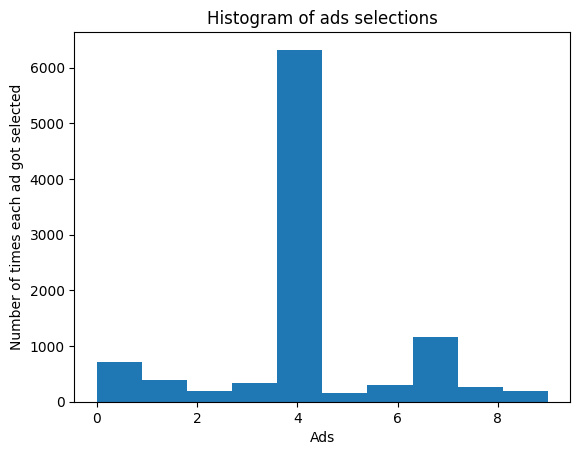

In [21]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad got selected")
plt.show()